**Ваша цель:** дать рекомендации по повышению эффективности контекстной
рекламы в сети Яндекс-Директ.
Задачи:
1. На основе полученных данных необходимо дать рекомендации по оптимизации
объявлений: какие объявления можно отключить, какие объявления можно улучшить,
какие объявления обладают хорошими показателями эффективности (для этого оцените
CTR и CPC).
2. Предложите, как можно оптимизировать коэффициент конверсии: найдите
посадочные страницы, у которых низкий коэффициент конверсии.
3. Дайте рекомендации по перераспределению бюджета между рекламными
кампаниями и группами объявлений на основе стоимости звонка.
4. Вычислите и визуализируйте CPL по рекламным кампаниям. Сделайте
соответствующие выводы

**Этап 1: загрузка и первичный анализ данных**




In [6]:
!pip install pandas

   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.3 MB 3.4 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.3 MB 3.6 MB/s eta 0:00:03
   --------- ------------------------------ 2.6/11.3 MB 3.9 MB/s eta 0:00:03
   ------------ --------------------------- 3.4/11.3 MB 3.8 MB/s eta 0:00:03
   ------------- -------------------------- 3.9/11.3 MB 3.7 MB/s eta 0:00:03
   ----------------- ---------------------- 5.0/11.3 MB 3.8 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.3 MB 4.0 MB/s eta 0:00:02
   ------------------------- -------------- 7.3/11.3 MB 4.2 MB/s eta 0:00:01
   ---------------------------- ----------- 8.1/11.3 MB 4.3 MB/s eta 0:00:01
   -------------------------------- ------- 9.2/11.3 MB 4.2 MB/s eta 0:00:01
   ----------------------------------- ---- 10.0/11.3 MB 4.2 MB/s eta 0:00:01
   ---------

In [14]:
!pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]



In [15]:
import pandas as pd #импортируем библиотеку pandas
import os #для работы с операционной системой
import warnings
warnings.filterwarnings('ignore') #чтобы предупреждения не раздражали


In [16]:
# загружаем наши данные (вставляйте вместо точек то, что необходимо для корректной работы кода) в переменные
os.chdir(r"C:\Users\pasht\OneDrive\Документы\4 курс 1 семестр\прикладная аналитика\практическая 4")
data1 = pd.read_excel('data_pr6-7.xlsx', sheet_name = 'sessions_new')
data2 = pd.read_excel('data_pr6-7.xlsx', sheet_name = 'ads_Yandex')
data3 = pd.read_excel('data_pr6-7.xlsx', sheet_name = 'calls_new')

In [17]:
# info позволяет выводить основную информацию о дата-сете: тип данных столбцов, количество строк и пр.
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          3800 non-null   object 
 1   source_type  3800 non-null   object 
 2   page         3800 non-null   object 
 3   city         3668 non-null   object 
 4   campaign_id  460 non-null    float64
 5   group_id     460 non-null    float64
 6   ad_id        460 non-null    float64
 7   keyword_id   460 non-null    float64
 8   sessions     3800 non-null   int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 267.3+ KB


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            986 non-null    object 
 1   campaign_id    986 non-null    int64  
 2   group_id       986 non-null    int64  
 3   ad_id          986 non-null    int64  
 4   keyword_id     986 non-null    int64  
 5   campaign_name  986 non-null    object 
 6   group_name     986 non-null    object 
 7   ad_name        986 non-null    object 
 8   keyword        986 non-null    object 
 9   cost           986 non-null    float64
 10  clicks         986 non-null    int64  
 11  shows          986 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 92.6+ KB


In [854]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          443 non-null    object 
 1   source_type  443 non-null    object 
 2   page         443 non-null    object 
 3   city         426 non-null    object 
 4   campaign_id  47 non-null     float64
 5   group_id     47 non-null     float64
 6   ad_id        47 non-null     float64
 7   keyword_id   47 non-null     float64
 8   calls        443 non-null    int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 31.3+ KB


In [856]:
# head и tail позволяют выводить первые или последние несколько строк в датафрейме
display(data1.head(5))
data1.tail()

,day,source_type,page,city,campaign_id,group_id,ad_id,keyword_id,sessions
0,2019-03-31,direct,/dveri-s-termorazryivom/,Южно-Сахалинск,NaN,NaN,NaN,NaN,1
1,2019-03-31,direct,/paradnye-dveri/,Москва,NaN,NaN,NaN,NaN,1
2,2019-03-31,internal,/tipyi-metallokonstrukczij/,Москва,NaN,NaN,NaN,NaN,1
3,2019-03-31,internal,/vxodnaya-dver-s-zerkalom-next,Москва,NaN,NaN,NaN,NaN,1
4,2019-03-31,internal,/vxodnyie-dveri-metallicheskie,Москва,NaN,NaN,NaN,NaN,1


,day,source_type,page,city,campaign_id,group_id,ad_id,keyword_id,sessions
3795,2019-04-30,referral,/paradnaya-dver-london?ymclid=,Москва,NaN,NaN,NaN,NaN,1
3796,2019-04-30,referral,/s-shumoizolyacziej/,Москва,NaN,NaN,NaN,NaN,1
3797,2019-04-30,referral,/vxodnaya-dver-s-zerkalom-vekt,Москва,NaN,NaN,NaN,NaN,2
3798,2019-04-30,referral,/vxodnaya-v-kvartiru-grafit-so,Москва,NaN,NaN,NaN,NaN,3
3799,2019-04-30,referral,/vzlomstojkaya-vxodnaya-dver-b,Москва,NaN,NaN,NaN,NaN,1


In [858]:
# для закрепления повторите то же самое для data2, data3
display(data2.head(),
data2.tail(),
data3.head(),
data3.tail())


,day,campaign_id,group_id,ad_id,keyword_id,campaign_name,group_name,ad_name,keyword,cost,clicks,shows
0,2019-04-01,1194086,153787377,369955376,513993806,Арочные - Поиск - Москва и часть МО,"металлические, стальные",#Двери металлические арочные#! - На заказ. Мск...,Двери металлические арочные -входные -изготовл...,0.0,0,1
1,2019-04-01,1194086,153787377,369955376,513993807,Арочные - Поиск - Москва и часть МО,"металлические, стальные",#Двери металлические арочные#! - На заказ. Мск...,Металлические двери с аркой -двухстворчатые,0.0,0,1
2,2019-04-01,1194086,153787377,369955376,513993808,Арочные - Поиск - Москва и часть МО,"металлические, стальные",#Двери металлические арочные#! - На заказ. Мск...,Двери входные арочные металлические,0.0,0,2
3,2019-04-01,1194086,153787377,369955376,513993810,Арочные - Поиск - Москва и часть МО,"металлические, стальные",#Двери металлические арочные#! - На заказ. Мск...,Изготовление арочных металлических дверей,0.0,0,3
4,2019-04-01,1194086,153787377,369955376,561904495,Арочные - Поиск - Москва и часть МО,"металлические, стальные",#Двери металлические арочные#! - На заказ. Мск...,Двери арочные входные с массивом,0.0,0,2


,day,campaign_id,group_id,ad_id,keyword_id,campaign_name,group_name,ad_name,keyword,cost,clicks,shows
981,2019-04-29,1370731,171187475,416330315,584734251,"С Зеркалом - Поиск - Москва, МО",22,Купить входную дверь с зеркалом - по справедли...,Входная дверь с зеркалом купить -белые -внутри...,0.0000,0,1
982,2019-04-29,1370731,171187477,416106527,584734263,"С Зеркалом - Поиск - Москва, МО",23,#Входные двери с зеркалом# - От производителя!,Входная дверь New York с зеркалом,94.9792,1,1
983,2019-04-29,1370731,171187479,416106529,584734285,"С Зеркалом - Поиск - Москва, МО",24,Входные двери с зеркалом - От производителя!,Входная дверь с зеркалом 2мм,0.0000,0,1
984,2019-04-29,1370731,171273123,416330327,584989543,"С Зеркалом - Поиск - Москва, МО",с установкой,Входные двери с зеркалом - С установкой. Мск и...,Входные двери с зеркалом +с !установкой,355.8102,1,1
985,2019-04-29,1370731,171273123,416330329,584989543,"С Зеркалом - Поиск - Москва, МО",с установкой,Входные двери с зеркалом - по справедливой цене!,Входные двери с зеркалом +с !установкой,314.5650,1,1


,day,source_type,page,city,campaign_id,group_id,ad_id,keyword_id,calls
0,2019-03-31,direct,/dveri-s-termorazryivom/,Южно-Сахалинск,NaN,NaN,NaN,NaN,1
1,2019-03-31,organic,/dovodchik-diplomat,NaN,NaN,NaN,NaN,NaN,1
2,2019-04-01,direct,/dveri-s-termorazryivom/,Тамбов,NaN,NaN,NaN,NaN,1
3,2019-04-01,internal,/search?page=2&query=Дверь с з,Москва,NaN,NaN,NaN,NaN,1
4,2019-04-01,organic,/,Краснодар,NaN,NaN,NaN,NaN,1


,day,source_type,page,city,campaign_id,group_id,ad_id,keyword_id,calls
438,2019-04-30,internal,/elitnye-vhodnye-dveri-v-kvart,Краснодар,NaN,NaN,NaN,NaN,1
439,2019-04-30,organic,/,Москва,NaN,NaN,NaN,NaN,1
440,2019-04-30,organic,/cisa-56436,Москва,NaN,NaN,NaN,NaN,1
441,2019-04-30,organic,/dveri-s-termorazryivom/,Москва,NaN,NaN,NaN,NaN,1
442,2019-04-30,organic,/s-shumoizolyacziej/,Москва,NaN,NaN,NaN,NaN,1


**Этап 2: решение задания по CTR и CPC по объявлениям**




In [860]:
# для расчета CTR и CPC нам понадобятся данные из data2, т.к. именно эта таблица содержит клики и показы
ctr = data2.groupby(
    data2['ad_name']  #groupby позволяет группировать данные по объявлениям
    ).agg(
        {'clicks':'sum', # agg позволяет рассчитывать по ранее заданным группам агрегированные значения других показателей
         'shows':'sum'}
        ).reset_index() #сбрасывает индекс (попробуйте посмотреть, что будет если не указывать этот параметр)

ctr

,ad_name,clicks,shows
0,#Белые входные двери с зеркалом# - От производ...,9,47
1,#Белые входные двери с зеркалом# - по справедл...,1,22
2,#Входные арочные двери для дома#! - Новый ката...,16,130
3,#Входные двери с зеркалом внутри# - купить от ...,7,25
4,#Входные двери с зеркалом внутри# - по справед...,3,9
...,...,...,...
72,Металлические двери со вставкой! - Размеры любые!,0,6
73,Нестандартные входные двери,1,5
74,Нестандартные входные двери! - Размеры любые!,1,21
75,Нестандартные металлические двери! - Размеры л...,0,2


In [862]:
# для получения справки по функции с примерами
df = pd.DataFrame()
#help(df.groupby)

In [864]:
#создаем новый столбец с показателем ctr как отношение показателей
ctr['ctr'] = round(ctr['clicks'] / ctr['shows'], 2) #round позволяет округлять


In [866]:
#сортируем по убыванию (ascending = False) и выводим первые 10 значений
ctr.sort_values('ctr', ascending = False).head(10)

,ad_name,clicks,shows,ctr
29,#Металлические двери с зеркалом# - по справедл...,1,1,1.00
28,#Металлические двери с зеркалом# - купить в Мо...,3,4,0.75
27,#Металлические двери с зеркалом# - От производ...,4,6,0.67
13,#Двери в котельную с вентиляцией#! - Со стекло...,2,3,0.67
63,Металлические двери,1,2,0.50
42,Входные двери с зеркалом - и шумоизоляцией. Мс...,18,42,0.43
12,#Двери в котельную дома#! - Со стеклом и без!,2,5,0.40
15,#Двери входные с зеркалом и дубом# - От произв...,2,5,0.40
56,Двери входные с зеркалом - по справедливой цене!,3,8,0.38
53,Двери входные металлические - с зеркалом от 15...,6,16,0.38


In [868]:
#сортируем по возрастанию и выводим первые 10 значений
ctr.sort_values('ctr').head(10)

,ad_name,clicks,shows,ctr
75,Нестандартные металлические двери! - Размеры л...,0,2,0.0
20,#Двери металлические под размер#! - Размеры лю...,0,7,0.0
14,#Двери в котельную со стеклом#! - С вентрешетк...,0,17,0.0
68,Металлические двери по размерам! - Размеры любые!,0,2,0.0
58,Двери для котельной с решеткой! - Со стеклом и...,0,3,0.0
11,#Двери в комнату хранения наркотиков#! - Серти...,0,5,0.0
55,Двери входные с зеркалом - От производителя!,0,3,0.0
16,#Двери входные с зеркалом и дубом# - по справе...,0,7,0.0
8,#Двери в квартиру с зеркалом# - От производителя!,0,5,0.0
31,#Нестандартные металлические двери#! - Размеры...,0,1,0.0


In [870]:
# теперь перейдем к cpc, для этого нам нужно найти сумму затрат и количество кликов через известный нам groupby()
cpc = data2.groupby(data2['ad_name']).agg({'cost':'sum', 'clicks': 'sum'}).reset_index()


In [872]:
#создаем новый столбец с показателем cpc как отношение показателей с округлением до 2 знаков
cpc['cpc'] = round(cpc['cost']/cpc['clicks'], 2)


In [874]:
#сортируем по убыванию (ascending = False) и выводим первые 10 значений
cpc.sort_values('cpc', ascending = False).head(10)

,ad_name,cost,clicks,cpc
47,Входные металлические двери,1228.9944,2,614.50
76,Противопожарные двери в котельную! - Со стекло...,503.4380,1,503.44
57,Двери для газовой котельной! - Со стеклом и без!,421.0816,1,421.08
38,Входные двери на заказ! - Размеры любые!,1481.2628,4,370.32
18,#Двери железные нестандартные#! - Размеры любые!,1265.5496,4,316.39
67,Металлические двери на заказ! - Размеры любые!,532.0202,2,266.01
33,#Стальные двери на заказ#! - Размеры любые!,779.2770,3,259.76
62,Металлические входные двери,256.6636,1,256.66
64,Металлические двери в котельную! - Со стеклом ...,919.6152,4,229.90
53,Двери входные металлические - с зеркалом от 15...,1256.6386,6,209.44


In [876]:
#сортируем по возрастанию и выводим первые 10 значений
cpc.sort_values('cpc').head(10)

,ad_name,cost,clicks,cpc
30,#Металлические двери с фрамугой#! - Размеры лю...,98.4096,2,49.20
6,#Входные двери с зеркалом# - по справедливой ц...,154.3814,3,51.46
1,#Белые входные двери с зеркалом# - по справедл...,56.3336,1,56.33
24,#Железные двери с зеркалом# - по справедливой ...,59.8310,1,59.83
9,#Двери в квартиру с зеркалом# - по справедливо...,204.8056,3,68.27
35,#Стальные двери с зеркалом# - по справедливой ...,220.0950,3,73.37
10,#Двери в комнату хранения наркотиков#! - От 29...,74.1288,1,74.13
40,Входные двери с зеркалом - От производителя!,153.9794,2,76.99
23,#Железные двери с зеркалом# - От производителя!,602.5846,7,86.08
5,#Входные двери с зеркалом# - От производителя!,1145.7402,13,88.13


In [878]:
# пробуем объединить данные через метод merge
cpc_ctr = ctr.merge(cpc, #указываем какую таблицу с какой объединяем
                    on = 'ad_name', #указываем общий ключ
                    how = 'inner') #тип соединения
cpc_ctr.drop('clicks_y', axis = 1,inplace = True)  #метод drop позволяет удалить нам ненужный повторяющийся столбец
cpc_ctr

,ad_name,clicks_x,shows,ctr,cost,cpc
0,#Белые входные двери с зеркалом# - От производ...,9,47,0.19,1028.6912,114.30
1,#Белые входные двери с зеркалом# - по справедл...,1,22,0.05,56.3336,56.33
2,#Входные арочные двери для дома#! - Новый ката...,16,130,0.12,2060.0088,128.75
3,#Входные двери с зеркалом внутри# - купить от ...,7,25,0.28,855.2952,122.19
4,#Входные двери с зеркалом внутри# - по справед...,3,9,0.33,384.0172,128.01
...,...,...,...,...,...,...
72,Металлические двери со вставкой! - Размеры любые!,0,6,0.00,0.0000,NaN
73,Нестандартные входные двери,1,5,0.20,128.4926,128.49
74,Нестандартные входные двери! - Размеры любые!,1,21,0.05,105.4982,105.50
75,Нестандартные металлические двери! - Размеры л...,0,2,0.00,0.0000,NaN


In [880]:
# выведем описательные статистики по cpc_ctr
round(cpc_ctr.describe(), 2)

,clicks_x,shows,ctr,cost,cpc
count,77.00,77.00,77.00,77.00,63.00
mean,5.91,32.49,0.20,836.17,155.94
std,11.39,59.39,0.18,1542.63,101.41
min,0.00,1.00,0.00,0.00,49.20
25%,1.00,6.00,0.09,105.50,106.02
50%,3.00,13.00,0.18,384.02,133.94
75%,7.00,33.00,0.25,1131.97,149.96
max,84.00,385.00,1.00,11272.00,614.50


In [882]:
# наша задача - дать рекомендации. давайте создадим столбец, с соответствующей рекомендацией по каждому объявлению
cpc_ctr['Recommendation'] = '' #создаем пустой столбец

In [884]:
cpc_ctr

,ad_name,clicks_x,shows,ctr,cost,cpc,Recommendation
0,#Белые входные двери с зеркалом# - От производ...,9,47,0.19,1028.6912,114.30,
1,#Белые входные двери с зеркалом# - по справедл...,1,22,0.05,56.3336,56.33,
2,#Входные арочные двери для дома#! - Новый ката...,16,130,0.12,2060.0088,128.75,
3,#Входные двери с зеркалом внутри# - купить от ...,7,25,0.28,855.2952,122.19,
4,#Входные двери с зеркалом внутри# - по справед...,3,9,0.33,384.0172,128.01,
...,...,...,...,...,...,...,...
72,Металлические двери со вставкой! - Размеры любые!,0,6,0.00,0.0000,NaN,
73,Нестандартные входные двери,1,5,0.20,128.4926,128.49,
74,Нестандартные входные двери! - Размеры любые!,1,21,0.05,105.4982,105.50,
75,Нестандартные металлические двери! - Размеры л...,0,2,0.00,0.0000,NaN,


In [886]:
# при помощи функции loc мы обращаемся к данным по условию, и для этого условия устанавливаем рекомендацию

cpc_ctr.loc[(cpc_ctr.cpc.isna()) | (cpc_ctr.ctr == 0), # условие
            'Recommendation'] = 'Отключить' #при выполнении условия выше, рекомендуется отключить это объявление



In [890]:
print(cpc_ctr.dtypes)

ad_name            object
clicks_x            int64
shows               int64
ctr               float64
cost              float64
cpc               float64
Recommendation     object
dtype: object


In [892]:
# продолжите самостоятельно используя ранее выведенные с помощью describe() описательные статистики
cpc_ctr.loc[(cpc_ctr.ctr <= 0.09) | (cpc_ctr.cpc >= 149.962750), 'Recommendation'] = 'Высокая цена клика'
cpc_ctr.loc[(cpc_ctr.ctr >= 0.25) | (cpc_ctr.cpc <= 106.02), 'Recommendation'] = 'Самые эффективные'
cpc_ctr.loc[(cpc_ctr.ctr.isna()) | (cpc_ctr.ctr <= 0.09), 'Recommendation'] = 'Нужно улучшить CTR'
cpc_ctr.loc[(cpc_ctr.ctr > 0.09) & (cpc_ctr.ctr < 0.25) & (cpc_ctr.cpc > 106.025000) & (cpc_ctr.cpc < 149.965000), 'Recommendation'] = 'В пределах нормы'
cpc_ctr

,ad_name,clicks_x,shows,ctr,cost,cpc,Recommendation
0,#Белые входные двери с зеркалом# - От производ...,9,47,0.19,1028.6912,114.30,В пределах нормы
1,#Белые входные двери с зеркалом# - по справедл...,1,22,0.05,56.3336,56.33,Нужно улучшить CTR
2,#Входные арочные двери для дома#! - Новый ката...,16,130,0.12,2060.0088,128.75,В пределах нормы
3,#Входные двери с зеркалом внутри# - купить от ...,7,25,0.28,855.2952,122.19,Самые эффективные
4,#Входные двери с зеркалом внутри# - по справед...,3,9,0.33,384.0172,128.01,Самые эффективные
...,...,...,...,...,...,...,...
72,Металлические двери со вставкой! - Размеры любые!,0,6,0.00,0.0000,NaN,Нужно улучшить CTR
73,Нестандартные входные двери,1,5,0.20,128.4926,128.49,В пределах нормы
74,Нестандартные входные двери! - Размеры любые!,1,21,0.05,105.4982,105.50,Нужно улучшить CTR
75,Нестандартные металлические двери! - Размеры л...,0,2,0.00,0.0000,NaN,Нужно улучшить CTR


In [894]:
# выведем, сколько будет в каждой категории объявлений
cpc_ctr['Recommendation'].value_counts()

Recommendation
Самые эффективные     28
Нужно улучшить CTR    21
В пределах нормы      18
Высокая цена клика    10
Name: count, dtype: int64

Наиболее эффективными являются 28 рекламных объявлений, а 21 требует улучшения CTR — это ключевая зона роста. Ещё 18 объявлений работают в норме, но 10 имеют высокую цену клика, что может снижать общую рентабельность.

**Этап 3: расчет коэффициента конверсии по страницам**

In [896]:
#сгруппируем data1 и data3 по page и объединим полученные таблицы в сводную таблицу по page

data11 = data1.groupby(data1['page']).agg({'sessions': 'sum'}).reset_index()
data33 = data3.groupby(data3['page']).agg({'calls': 'sum'}).reset_index()

data1_3 = data11.merge(data33, on = 'page', how = 'inner')

In [898]:
data1_3

,page,sessions,calls
0,/,663,58
1,/?tv|filter-naz=Для квартиры&m,3,1
2,/arochnye-dveri/,54,4
3,/avtomaticheskie-porogi,6,1
4,/bronirovannyie/,44,3
...,...,...,...
130,/zamok-kale-152-3m,4,1
131,/zamok-kale-257-r,7,2
132,/zamok-kale-282-rd-(osnovnoj-p,9,1
133,/zamok-kale-472-lr-smart-line-,4,1


In [900]:
data1_3['conversion'] = round(data1_3.calls/data1_3.sessions, 2)
data1_3

,page,sessions,calls,conversion
0,/,663,58,0.09
1,/?tv|filter-naz=Для квартиры&m,3,1,0.33
2,/arochnye-dveri/,54,4,0.07
3,/avtomaticheskie-porogi,6,1,0.17
4,/bronirovannyie/,44,3,0.07
...,...,...,...,...
130,/zamok-kale-152-3m,4,1,0.25
131,/zamok-kale-257-r,7,2,0.29
132,/zamok-kale-282-rd-(osnovnoj-p,9,1,0.11
133,/zamok-kale-472-lr-smart-line-,4,1,0.25


In [902]:
round(data1_3.describe(), 2)

,sessions,calls,conversion
count,135.00,135.00,135.00
mean,33.94,3.64,0.31
std,92.18,8.61,0.29
min,1.00,1.00,0.02
25%,3.00,1.00,0.10
50%,7.00,1.00,0.20
75%,25.00,2.00,0.50
max,663.00,58.00,1.00


In [904]:
data1_3['group'] = ''

In [906]:
# сформируйте группы по конверсии
data1_3.loc[(data1_3.conversion >= 0.5), 'group'] = 'Высокая'
data1_3.loc[(data1_3.conversion > 0.0976) & (data1_3.conversion < 0.5), 'group'] = 'В пределах нормах'
data1_3.loc[data1_3.conversion <= 0.0976, 'group'] = 'Низкая'



In [908]:
data_l = data1_3.groupby('group').agg({'page': 'count'})
data_l

,page
group,
В пределах нормах,67
Высокая,35
Низкая,33


***Страницы с низкой конверсией***

In [910]:
просевшие_страницы = (data1_3[data1_3['group'] == 'Низкая']['page']).reset_index(drop=True)
print(просевшие_страницы)

0                                  /
1                   /arochnye-dveri/
2                   /bronirovannyie/
3     /dachnaya-termo-prof?ymclid=15
4     /dovodchik-pnevmaticheskij-mor
5     /dver-protivopozharnaya-skryit
6                        /dveri-kxo/
7                   /dveri-na-zakaz/
8                   /dveri-s-kovkoj/
9                 /dveri-uteplennye/
10                   /ekonom-klassa/
11    /eksczentrik-regulyator-pritvo
12    /italyanskij-zamok-vreznoj-sec
13    /magnitnaya-bronenakladka-dise
14                     /model-nord-2
15                /model-termo-sklad
16    /motornyij-zamok-mottura-x-–-n
17              /nemeckij-uplotnitel
18                       /podezdnye/
19                   /reshyotchatye/
20    /trexkonturnaya-dver-labirint-
21    /ulichnaya-dver-s-termorazryiv
22    /ulichnaya-vxodnaya-dver-prajm
23                 /ulichnyie-dveri/
24    /urovni-shumoizolyaczii-vxodny
25                     /v-kotelnuyu/
26    /verxnij-suvaldnyij-zamok-secu
2

Среди рекламных групп 33 имеют низкую конверсию — это критическая зона для оптимизации, так как они неэффективно используют бюджет. Большинство групп (67) работают в норме, а 35 показывают высокую конверсию — их стоит масштабировать и использовать как эталон.

**Этап 4: расчет cpl по рекламным компаниям**

In [912]:
#аналогично этапу 4: объединить данные, сгруппировать и вычислить значения, создать новый столбец
#объеденим данные по campaing_id
data_campaign_cpl_2 = data2.groupby(['campaign_id']).agg({'cost': 'sum'}).reset_index()
data_campaign_cpl_3 = data3.groupby(['campaign_id']).agg({'calls': 'sum'}).reset_index()

df_cpl_campaign = data_campaign_cpl_2.merge(data_campaign_cpl_3, on = 'campaign_id', how = 'inner')
df_cpl_campaign

,campaign_id,cost,calls
0,1194086,3726.9152,3
1,1194088,6559.8628,3
2,1194094,7126.8838,1
3,1370731,46897.2128,41


In [914]:
#теперь объединим по campaing_name 
df_cpl_campaign = df_cpl_campaign.merge(data2[['campaign_id', 'campaign_name']], on = 'campaign_id', how = 'right')
df_cpl_campaign

,campaign_id,cost,calls,campaign_name
0,1194086,3726.9152,3.0,Арочные - Поиск - Москва и часть МО
1,1194086,3726.9152,3.0,Арочные - Поиск - Москва и часть МО
2,1194086,3726.9152,3.0,Арочные - Поиск - Москва и часть МО
3,1194086,3726.9152,3.0,Арочные - Поиск - Москва и часть МО
4,1194086,3726.9152,3.0,Арочные - Поиск - Москва и часть МО
...,...,...,...,...
981,1370731,46897.2128,41.0,"С Зеркалом - Поиск - Москва, МО"
982,1370731,46897.2128,41.0,"С Зеркалом - Поиск - Москва, МО"
983,1370731,46897.2128,41.0,"С Зеркалом - Поиск - Москва, МО"
984,1370731,46897.2128,41.0,"С Зеркалом - Поиск - Москва, МО"


In [373]:
#ну я не понял как объединить без дублей поэтому просто удалю их
df_cpl_campaign = df_cpl_campaign.drop_duplicates(subset='campaign_id').reset_index(drop=True)
df_cpl_campaign

,campaign_id,cost,calls,campaign_name
0,1194086,3726.9152,3.0,Арочные - Поиск - Москва и часть МО
1,1370731,46897.2128,41.0,"С Зеркалом - Поиск - Москва, МО"
2,1194091,NaN,NaN,КХН - Поиск - Москва и часть МО
3,1194088,6559.8628,3.0,В котельную - Поиск - Москва и часть МО
4,1194094,7126.8838,1.0,"На заказ, нестандартные - Поиск - Москва"


In [375]:
#видим, что campaing_id = 1194091 имеет NaN, так что удалим его
df_cpl_campaign = df_cpl_campaign.drop(2, axis= 'index').reset_index(drop=True)
df_cpl_campaign


,campaign_id,cost,calls,campaign_name
0,1194086,3726.9152,3.0,Арочные - Поиск - Москва и часть МО
1,1370731,46897.2128,41.0,"С Зеркалом - Поиск - Москва, МО"
2,1194088,6559.8628,3.0,В котельную - Поиск - Москва и часть МО
3,1194094,7126.8838,1.0,"На заказ, нестандартные - Поиск - Москва"


In [377]:
#рассчитаем cpl
df_cpl_campaign['cpl'] = df_cpl_campaign.cost/df_cpl_campaign.calls
df_cpl_campaign

,campaign_id,cost,calls,campaign_name,cpl
0,1194086,3726.9152,3.0,Арочные - Поиск - Москва и часть МО,1242.305067
1,1370731,46897.2128,41.0,"С Зеркалом - Поиск - Москва, МО",1143.834459
2,1194088,6559.8628,3.0,В котельную - Поиск - Москва и часть МО,2186.620933
3,1194094,7126.8838,1.0,"На заказ, нестандартные - Поиск - Москва",7126.883800


In [379]:
#имя слишком длинное, укоротим его по "-"
df_cpl_campaign['campaign_name'] = df_cpl_campaign['campaign_name'].str.split(' - ').str[0]
df_cpl_campaign

,campaign_id,cost,calls,campaign_name,cpl
0,1194086,3726.9152,3.0,Арочные,1242.305067
1,1370731,46897.2128,41.0,С Зеркалом,1143.834459
2,1194088,6559.8628,3.0,В котельную,2186.620933
3,1194094,7126.8838,1.0,"На заказ, нестандартные",7126.883800


In [2]:
#визуалзируем cpl по кампаниям
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize = (12, 6))

sns.barplot(df_cpl_campaign.sort_values('cpl', ascending = False), x ='campaign_name', y= 'cpl', color = 'steelblue')
plt.axhline(y=df_cpl_campaign['cpl'].mean(), color='red', linestyle='--', label = 'Уровень оттока по банку')
plt.title('Cтоимость привлечения клиента по кампаниям', fontsize = 20)
plt.xlabel('Имя кампании', fontsize = 14)
plt.ylabel('стоимость привлечения клиента', fontsize = 14)
plt.text(0.9, 3010, 'средняя стоимость привлечения лида', color = 'red', fontsize=10)
plt.grid( axis='y', linestyle = '--', alpha = 0.5)

plt.show()

ModuleNotFoundError: No module named 'seaborn'

**Ликвидировать кампанию "На заказ, нестандартные", предварительно проанализировать и выявить причины такого высокого cpl, 
основную часть бюджета сфокусировать на кампаниях "Арочные" и "С Зеркалом", в кампанию "В котельную" инвестировать с осторожностью. 
 Также постараться проанализировать и понизить уровень cpl для всех кампаний**

In [589]:
#посчитаем также cpl для групп 

df_cpl_group_2 = data2.groupby(['group_id']).agg({'cost':'sum', 'group_name':'first'})
df_cpl_group_3 = data3.groupby(['group_id']).agg({'calls':'sum'})

df_cpl_group = df_cpl_group_2.merge(df_cpl_group_3, on = 'group_id', how='inner')
df_cpl_group['cpl'] = df_cpl_group.cost/df_cpl_group.calls
df_cpl_group

#имена не красивые: то текст то цифры, но какие есть

,cost,group_name,calls,cpl
group_id,,,,
153787035,308.4546,11,1,308.454600
153787214,1486.9712,1,1,1486.971200
153787222,2698.9074,9,1,2698.907400
153787223,919.6152,10,1,919.615200
153787378,2060.0088,"входные, в дом",3,686.669600
171187435,746.6346,2,1,746.634600
171187443,3216.2144,6,2,1608.107200
171187445,2064.3772,7,4,516.094300
171187447,121.7658,8,1,121.765800


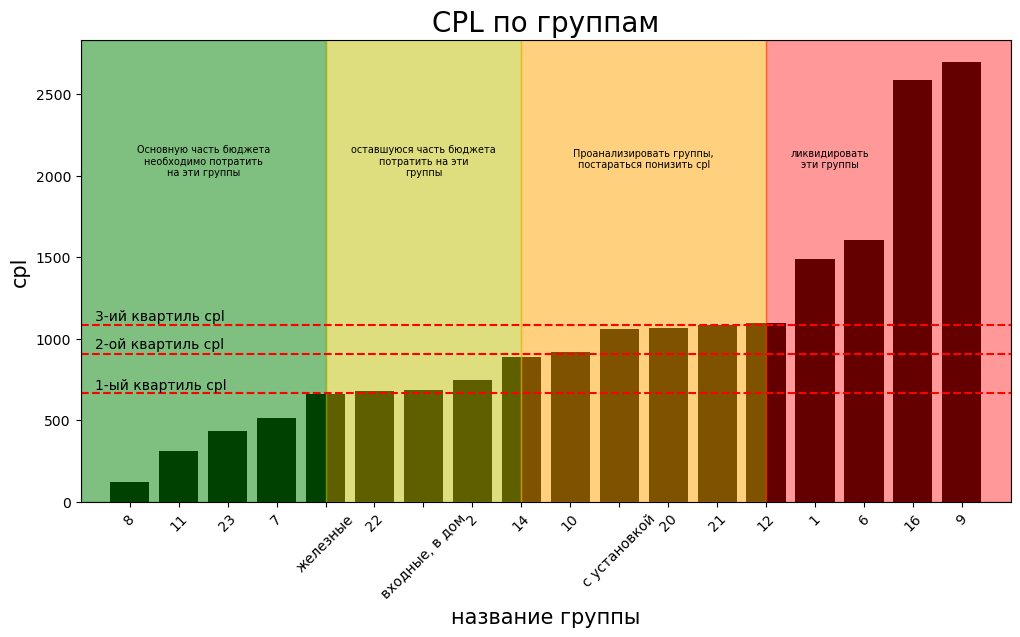

In [842]:
plt.figure(figsize=(12,6))
sns.barplot(df_cpl_group.sort_values('cpl'), x = 'group_name', y = 'cpl', color = 'black')
plt.title('CPL по группам', fontsize = 20)
plt.xlabel('название группы', fontsize = 15)
plt.ylabel('cpl', fontsize = 15)
plt.xticks(rotation = 45) #потому что текст не вмещается

plt.axhline(y = df_cpl_group['cpl'].quantile(0.5), color = 'red',  linestyle='--')
plt.text(-0.7, 940, '2-ой квартиль cpl', fontsize = 10)

plt.axhline(y=df_cpl_group['cpl'].quantile(0.25), color='red', linestyle='--')
plt.text(-0.7, 690, '1-ый квартиль cpl', fontsize = 10)

plt.axhline(y=df_cpl_group['cpl'].quantile(0.7), color='red', linestyle='--')
plt.text(-0.7, 1110, '3-ий квартиль cpl', fontsize = 10)



plt.text(x=1.5,y=2000, s='Основную часть бюджета\nнеобходимо потратить\nна эти группы', ha='center',fontsize=7)
plt.text(x=6,y=2000, s='оставшуюся часть бюджета\nпотратить на эти\nгруппы', ha='center',fontsize=7)
plt.text(x=10.5,y=2050, s='Проанализировать группы,\nпостараться понизить cpl', ha='center',fontsize=7)
plt.text(x=14.3,y=2050, s='ликвидировать\nэти группы', ha='center',fontsize=7)


#plt.axvspan(-1, 0, color = 'green', alpha = 0.5)
plt.axvspan(-1, 4, color = 'g', alpha = 0.5)
plt.axvspan('железные','14', color = 'y', alpha = 0.5)
plt.axvspan('14','12', color = 'orange', alpha = 0.5)
plt.axvspan(13, 18, color = 'r', alpha = 0.4)

plt.xlim(-1, len(df_cpl_group.group_name))  # надо обрезать потому что axvspan зачем-то пробелы сначала и с конца оставляет
plt.show()

Рекомендации по cpl на графике, вывод по кампаниям: Ликвидировать кампанию "На заказ, нестандартные", предварительно проанализировать и выявить причины такого высокого cpl, основную часть бюджета сфокусировать на кампаниях "Арочные" и "С Зеркалом", в кампанию "В котельную" инвестировать с осторожностью. Также постараться проанализировать и понизить уровень cpl для всех кампаний